# Lab 5 - self practice

## Objectives 
- understand how to compute covariance matrix from data
- and how to compute eigen-vectors and eigen-values

### Generating data ###

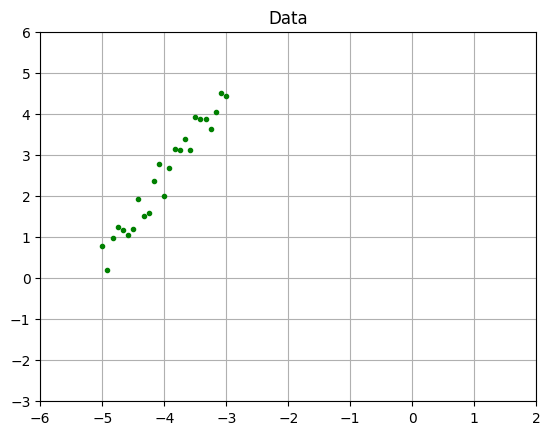

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

### Center data

[-0.7497216684991163, -0.7497216684991163]


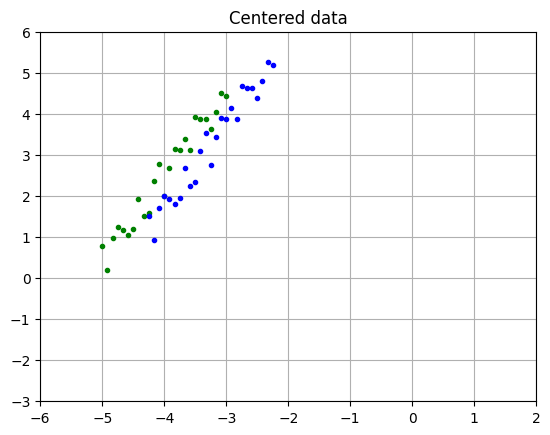

In [20]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
# write 2 lines below
mean_vector = [data.mean(),data.mean()]
print(mean_vector)
data_centered = np.subtract(data,data.mean()) # your code here

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

### Covariance matrix

In [21]:
# calculate covariance matrix for our centered data

cov_mat = np.cov(data,data_centered)
print('Covariance matrix:\n', cov_mat)

# Cov(x, y) = (1 / (n - 1)) * Sum_i(x_i * y_i)
# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = np.sum(data_centered[:, 0] * data_centered[:, 1] / (N-1))
print('cov(X,Y):', cov_xy)

Covariance matrix:
 [[16.65407098 14.72865638 16.73773856 ... 20.79601348 21.90447118
  21.47460271]
 [14.72865638 13.02584329 14.80265096 ... 18.39173959 19.372046
  18.99187559]
 [16.73773856 14.80265096 16.82182648 ... 20.90048957 22.01451599
  21.58248793]
 ...
 [20.79601348 18.39173959 20.90048957 ... 25.96807574 27.35221187
  26.81543317]
 [21.90447118 19.372046   22.01451599 ... 27.35221187 28.81012446
  28.24473468]
 [21.47460271 18.99187559 21.58248793 ... 26.81543317 28.24473468
  27.6904405 ]]
cov(X,Y): -10.236469890780544


### Eigenvectors and eigenvalues

In [22]:
# compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = None # your code here
print('eig_values:', eig_values)
print('eig_vectors:\n', eig_vectors)


# are they already in the needed order?
# if not, order eigenvectors and eigenvalues by eigenvalues, descending

idxs = None # your code here
eig_values = eig_values[idxs]
eig_vectors = eig_vectors[:, idxs]

print('\nsorteed eig_values:', eig_values)
print('sorted eig_vectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = None # your code here
print('\nretained variance:',   retained_var)

TypeError: cannot unpack non-iterable NoneType object

### Project data ###

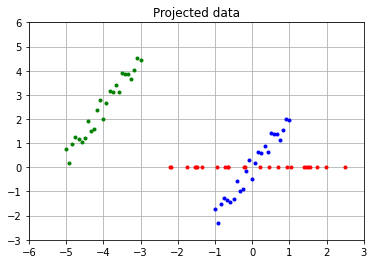

In [ ]:
# project data to the first principal component
first_pc = eig_vectors[:, :1]
projected_data = None # your code here

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(projected_data, np.zeros(len(projected_data)), '.', color="red")
plt.axis([-6, 3, -3, 6])
plt.grid('True')

### Restore data back ###

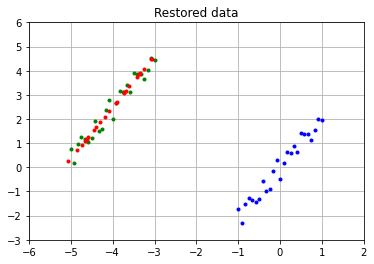

In [ ]:
# Projected_data . first_pc.T + means
# project data back to initial space
# remember to add a mean_vector to the restored data

restored_data = None # your code here

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.show()